In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
## norb: number of orbitals
## nw: Number of imaginary Matsubara frequencies
## nw_out: How many frequencies do you want on the real axis?
## emin, emax: The frequency range on the real axis
## inf: The filename of your Matsubara Green's function 
def pade_analytic_continuation(nw_out, emin, emax, inf):
    inf_data = np.load(inf)['Gloc']
    nw = len(inf_data)
    norb = 1
    if (len(inf_data.shape) == 2):
        norb = inf_data.shape[1]
    
    de = (emax-emin)/nw_out
    delta = 0.000000001

    gf = np.zeros((norb,nw),dtype=complex)
    wn = np.load(inf)['iwn']
    if norb == 1:
        gf[0] = inf_data
    else:
        for m in range(norb):
            gf[m] = data[:, m]

    # pade
    pmatrix = np.zeros((norb,nw,nw),dtype=complex)
    for m1 in range(norb):
        for n in range(nw):
            pmatrix[m1,0,n] = gf[m1,n]

        for m in range(1,nw):
            for n in range(1,m+1):
                if ( abs(pmatrix[m1,n-1,m]) < delta ):
                    continue
                pmatrix[m1,n,m] = ( pmatrix[m1,n-1,n-1] - pmatrix[m1,n-1,m] ) / ( pmatrix[m1,n-1,m]*( wn[m]-wn[n-1] ) )

    out = np.zeros((nw_out, 1 + norb), dtype=complex)
    for nn in range(nw_out):
        w = emin + nn*de
        out[nn][0] = w

        for m1 in range(norb):

            # find good n
            nstart = 0
            for m in range(nw):
                if ( abs(pmatrix[m1,m,m])<delta ):
                    break
                nstart += 1
            nstart = min(nstart,nw-1)
            nstart = nw-1

            val = 1.0 + pmatrix[m1,nstart,nstart]*( w - wn[nstart-1] )
            for m in range(nstart-1,0,-1):
                val = 1.0 + pmatrix[m1,m,m]*( w - wn[m-1] )/val
            val = pmatrix[m1,0,0]/val
            
            
            #outf.write(str(val.real) + '\t' + str(val.imag) + '\t')
            out[nn][1 + m1] = val

        #outf.write( '\n')
    #outf.close()
    
    return out

In [127]:
nw_out = 1000
emin = -94.0
emax = 94.0
inf = 'analytic_continuation_data/U0.5-beta100.npz'

out = pade_analytic_continuation(nw_out, emin, emax, inf)
print(out)

[[-9.40000000e+01+0.00000000e+00j -5.33525340e-02-5.34325900e-12j]
 [-9.38120000e+01+0.00000000e+00j -5.34601049e-02-5.36645616e-12j]
 [-9.36240000e+01+0.00000000e+00j -5.35681119e-02-5.38986978e-12j]
 ...
 [ 9.34360000e+01+0.00000000e+00j  5.36765576e-02+1.70068900e-11j]
 [ 9.36240000e+01+0.00000000e+00j  5.35681119e-02+1.68860943e-11j]
 [ 9.38120000e+01+0.00000000e+00j  5.34601049e-02+1.67668171e-11j]]


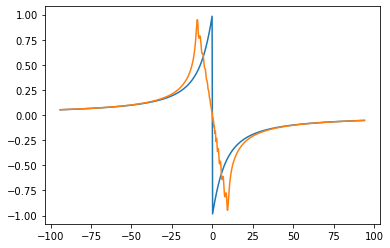

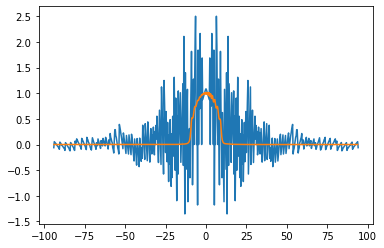

In [145]:
inf_data = np.load(inf)['Gloc']
iwn = np.load(inf)['iwn']
plt.plot(iwn.imag, inf_data.imag)
plt.plot(out[:, 0].real, -out[:, 1].real)

plt.figure()
plt.plot(iwn.imag, inf_data.real/np.max(inf_data.real)*2.5)
plt.plot(out[:, 0].real, out[:, 1].imag)